<a href="https://colab.research.google.com/github/LMVieira2/Machine-Learning-Fatec-Matao/blob/main/Atividade_Participa%C3%A7%C3%A3o_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Fatec Matão

## Importação de Bibliotecas

* O pandas é uma biblioteca do Python usada para manipulação e análise de dados, oferecendo estruturas como DataFrame e Series para organizar, filtrar, transformar e visualizar dados de forma eficiente. Documentação: https://pandas.pydata.org/docs/
* O NumPy é uma biblioteca do Python para cálculos numéricos, oferecendo arrays multidimensionais eficientes e funções matemáticas otimizadas para operações científicas e estatísticas. Documentação: https://numpy.org/doc/
* O Seaborn é uma biblioteca do Python para visualização de dados, baseada no Matplotlib, que facilita a criação de gráficos estatísticos elegantes e informativos com menos código. Documentação: https://seaborn.pydata.org/
* O matplotlib.pyplot é um módulo do Matplotlib que permite criar gráficos estáticos, interativos e personalizados em Python, sendo amplamente usado para visualização de dados. Documentação: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
* O plotly.express é uma biblioteca do Python para criar gráficos interativos e dinâmicos de forma simples, permitindo visualizações ricas e personalizáveis com poucos comandos. Documentação: https://plotly.com/python-api-reference/plotly.express.html

In [255]:
!pip install plotly --upgrade
!pip install squarify --upgrade

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Carregamento do Dataset

In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
credit_dataframe = pd.read_csv('/content/drive/MyDrive/am5t2/AtividadedeParticipação/credit_data.csv')
credit_dataframe

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## 1.Entenda a Estrutura dos Dados


### Visualize as primeiras linhas da base de dados e verifique os tipos de variáveis.

In [259]:
credit_dataframe.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [260]:
credit_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


### Identifique valores ausentes ou inconsistentes.

In [261]:
credit_dataframe.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [262]:
credit_dataframe.loc[pd.isnull(credit_dataframe['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [263]:
credit_dataframe.loc[credit_dataframe['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [264]:
np.unique(credit_dataframe['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

## 2.Análise Estatística Geral


### Calcule médias, medianas, desvios padrão e distribuições das principais variáveis numéricas.

In [265]:
credit_dataframe.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


### Identifique a presença de outliers e distribuições assimétricas

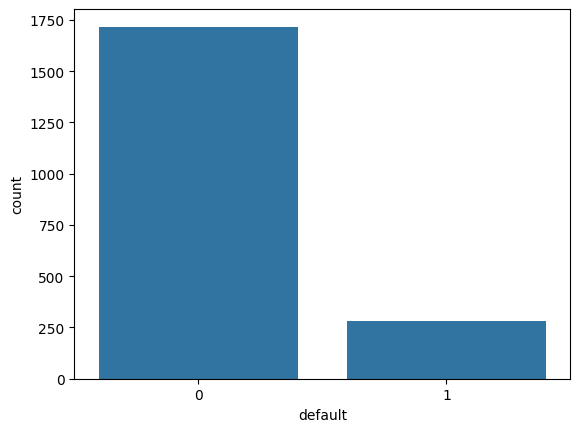

In [266]:
sns.countplot(x = credit_dataframe['default']);

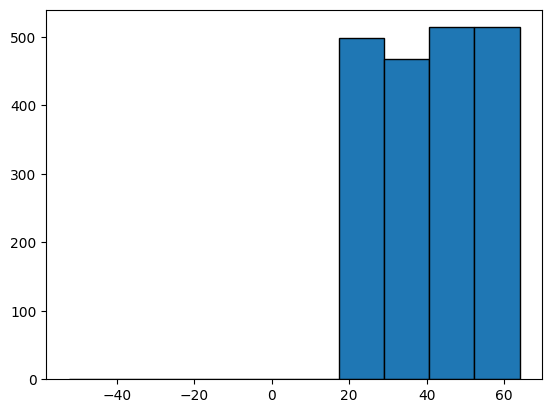

In [267]:
plt.hist(x = credit_dataframe['age'], edgecolor = 'black');

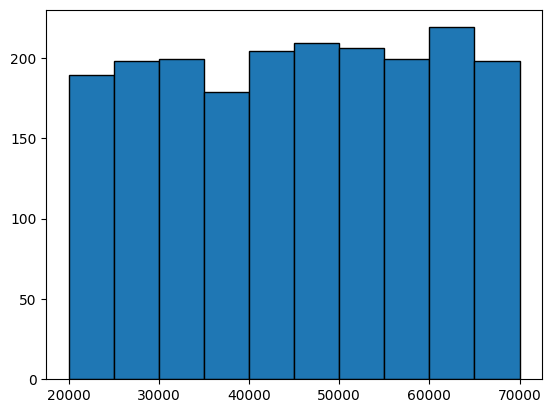

In [268]:
plt.hist(x = credit_dataframe['income'], edgecolor = 'black');

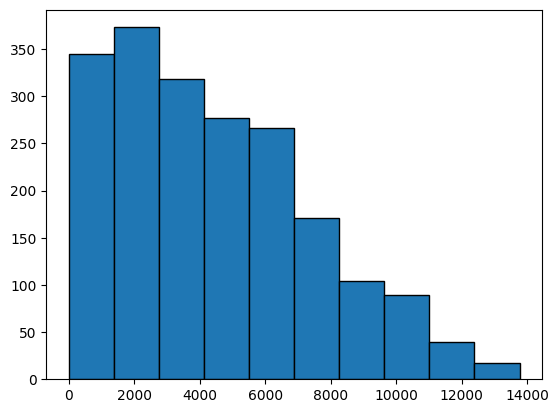

In [269]:
plt.hist(x = credit_dataframe['loan'], edgecolor = 'black');

In [270]:
graphic = px.scatter_matrix(credit_dataframe, dimensions=['age', 'income', 'loan'], color = 'default')
graphic.show()

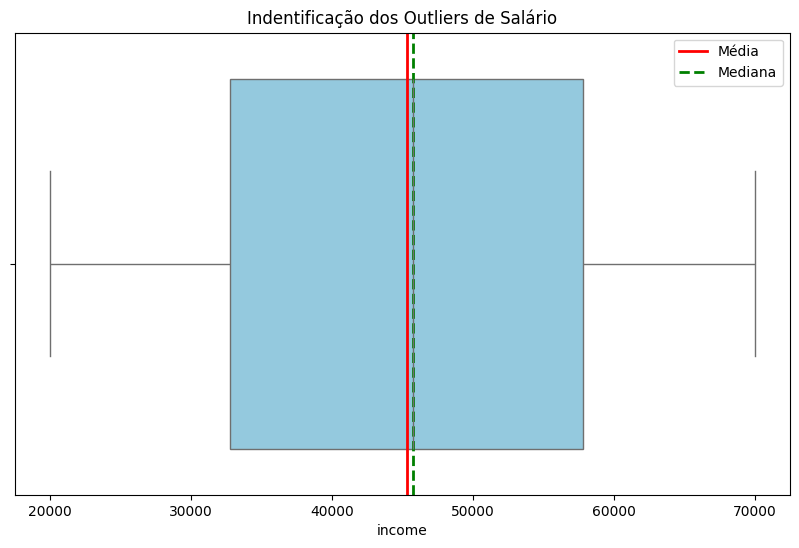

Média da Renda: 45331.60
Mediana da Renda: 45331.60
Desvio Padrão da Renda: 14326.33


In [271]:
media_income = credit_dataframe['income'].mean()
mediana_income = credit_dataframe['income'].median()
desvio_padrao_income = credit_dataframe['income'].std()

plt.figure(figsize=(10,6))
sns.boxplot(x = credit_dataframe['income'], color = 'skyblue')

plt.axvline(media_income, color = 'red', linewidth = 2, label = 'Média')
plt.axvline(mediana_income, color = 'green', linestyle = 'dashed', linewidth = 2, label = 'Mediana')

plt.title('Indentificação dos Outliers de Salário')
plt.legend()
plt.show()

print(f"Média da Renda: {media_income:.2f}")
print(f"Mediana da Renda: {media_income:.2f}")
print(f"Desvio Padrão da Renda: {desvio_padrao_income:.2f}")

### correção de outliers

In [272]:
credit_dataframe_anomalic_age = credit_dataframe
credit_dataframe_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [273]:
credit_dataframe_anomalic_age = credit_dataframe_anomalic_age.drop(credit_dataframe_anomalic_age[credit_dataframe_anomalic_age['age'] < 0].index)
credit_dataframe_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [274]:
structured_age_mean = credit_dataframe_anomalic_age['age'].mean()
structured_age_mean

40.92770044906149

In [275]:
credit_dataframe.loc[credit_dataframe['age'] < 0, 'age'] = structured_age_mean
credit_dataframe

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [276]:
credit_dataframe['age'].mean()

40.92770044906149

In [277]:
credit_dataframe['age'].fillna(credit_dataframe['age'].mean(), inplace=True)
credit_dataframe

<ipython-input-277-3b723c5cbce6>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [278]:
credit_dataframe.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


In [279]:
credit_dataframe['age'].mean()

40.92770044906149

## 3.Correlação Entre Variáveis


### Utilize um mapa de calor (heatmap) para visualizar as correlações entre os atributos

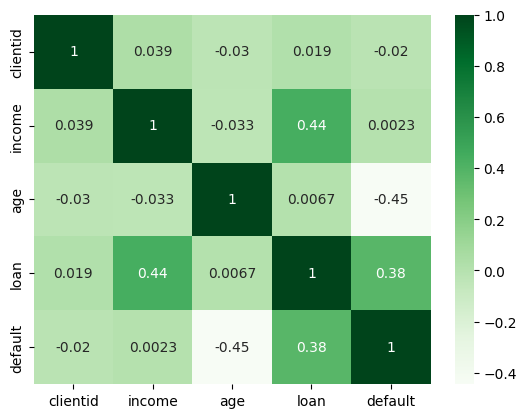

In [280]:
sns.heatmap(credit_dataframe.corr(), cmap = 'Greens', annot = True);

### Identifique quais variáveis têm maior impacto no risco de crédito

Os valores do atributo Default definem o perfil de pagador. Desta forma, ao analisar o Heatmap é possivel visualizar a correlação entre os atributos, onde Loan e Income possume maior nivel de correlatividade.

## 4.Distribuição de Clientes Aprovados e Negados

### Crie gráficos de barras para visualizar a proporção de clientes aprovados e negados

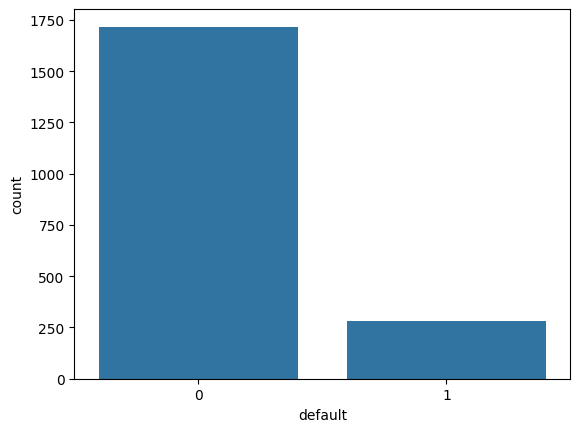

In [281]:
sns.countplot(x = credit_dataframe['default']);

### Avalie quais fatores mais influenciam a decisão final.

In [282]:
graphic = px.scatter_matrix(credit_dataframe, dimensions=['income', 'loan'], color = 'default')
graphic.show()

In [283]:
graphic = px.scatter_matrix(credit_dataframe, dimensions=['age', 'loan'], color = 'default')
graphic.show()

In [284]:
graphic = px.scatter_matrix(credit_dataframe, dimensions=['age', 'income'], color = 'default')
graphic.show()

## 5.Relação entre Idade e Aprovação de Crédito

### Analise se existe uma faixa etária com maior dificuldade para obter crédito.

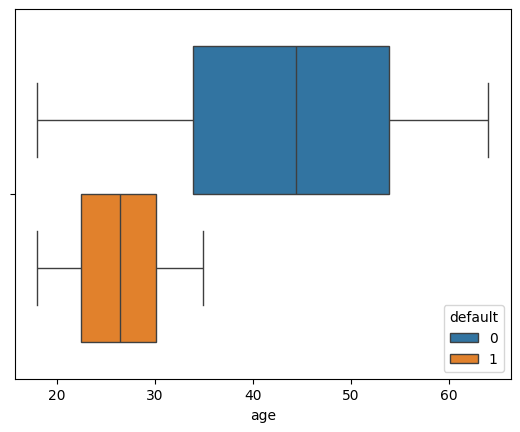

In [285]:
sns.boxplot(data=credit_dataframe, x='age', hue='default');

## 6.Impacto da Renda no Score de Crédito

### Calculo de score

In [286]:
def calcular_score(income, age, loan, default):
    proporcao_emprestimo = loan / income
    score = (1000
              - (10000 * proporcao_emprestimo**1.5)
              + (age * 1)
              - (200 * default))
    return max(min(score, 1000), 0)

In [287]:
credit_dataframe['score'] = credit_dataframe.apply(lambda row: calcular_score(row['income'], row['age'], row['loan'], row['default']), axis=1)

In [288]:
credit_dataframe.head(30)

,clientid,income,age,loan,default,score
0,1,66155.925095,59.017015,8106.532131,0,630.074057
1,2,34415.153966,48.117153,6564.745018,0,215.007401
2,3,57317.170063,63.108049,8020.953296,0,539.613853
3,4,42709.534201,45.751972,6103.642260,0,505.500008
4,5,66952.688845,18.584336,8770.099235,1,344.500960
5,6,24904.064140,57.471607,15.498598,0,1000.000000
6,7,48430.359613,26.809132,5722.581981,0,620.635718
7,8,24500.141984,32.897548,2971.003310,1,410.616295
8,9,40654.892537,55.496853,4755.825280,0,655.395877
9,10,25075.872771,39.776378,1409.230371,0,906.550404


In [289]:
credit_dataframe.describe()

,clientid,income,age,loan,default,score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927700,4444.369695,0.141500,659.728332
std,577.494589,14326.327119,13.251870,3045.410024,0.348624,300.729647
min,1.000000,20014.489470,18.055189,1.377630,0.000000,0.000000
25%,500.750000,32796.459717,29.102161,1939.708847,0.000000,401.656889
50%,1000.500000,45789.117313,41.300710,3974.719419,0.000000,728.461228
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000,935.796029
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000,1000.000000


### Verifique se há uma relação direta entre renda e pontuação de crédito

In [290]:
graphic = px.scatter_matrix(credit_dataframe, dimensions=['age', 'income', 'loan'], color = 'score')
graphic.show()

<Axes: xlabel='income', ylabel='score'>

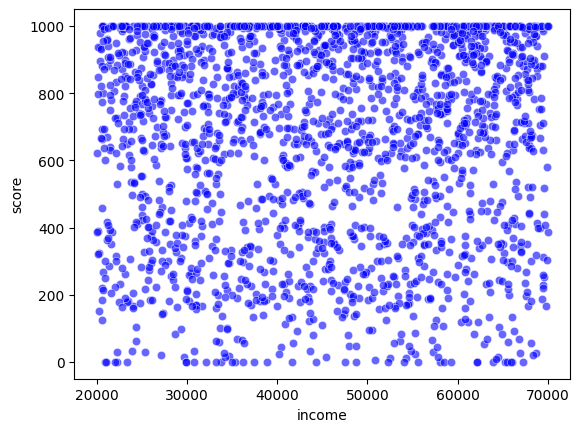

In [291]:
sns.scatterplot(x='income', y='score', data=credit_dataframe, color='blue', alpha=0.6)

## 8.Tempo de Histórico de Crédito e Aprovação

### Existe um número mínimo de anos de histórico de crédito para aprovação?

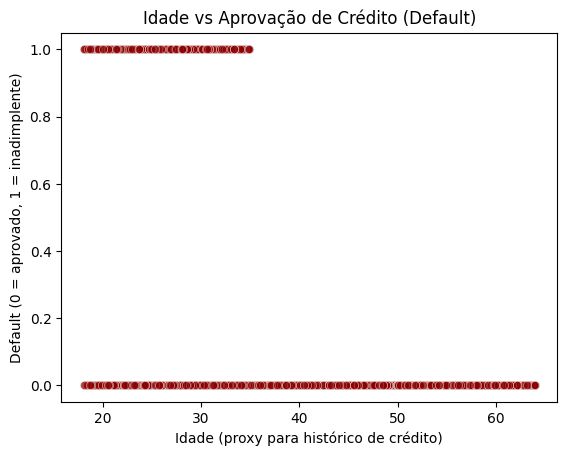

In [292]:
sns.scatterplot(x='age', y='default', data=credit_dataframe, color='darkred', alpha=0.6)

plt.title('Idade vs Aprovação de Crédito (Default)')
plt.xlabel('Idade (proxy para histórico de crédito)')
plt.ylabel('Default (0 = aprovado, 1 = inadimplente)')
plt.show()

Distribuição clara de aprovados e inadimplentes:

*   Aprovados (default = 0): Estão espalhados por todas as idades, com uma concentração consistente entre 20 e 60 anos.
*   Inadimplentes (default = 1): Aparecem principalmente entre 20 e 35 anos.

Padrão de histórico de crédito:
Não há uma idade mínima óbvia para aprovação, já que há aprovados em todas as faixas etárias. Porém, inadimplentes tendem a ser mais jovens, indicando que quem tem menos histórico de crédito pode ter mais dificuldade em manter pagamentos.

Zona de risco (20–35 anos):
Parece haver uma maior concentração de inadimplentes abaixo dos 35 anos, sugerindo que o risco de default diminui à medida que a idade (e, por consequência, o histórico de crédito) aumenta.

### Gráfico com linha de tendência (Idade vs Default):

<Axes: xlabel='age', ylabel='default'>

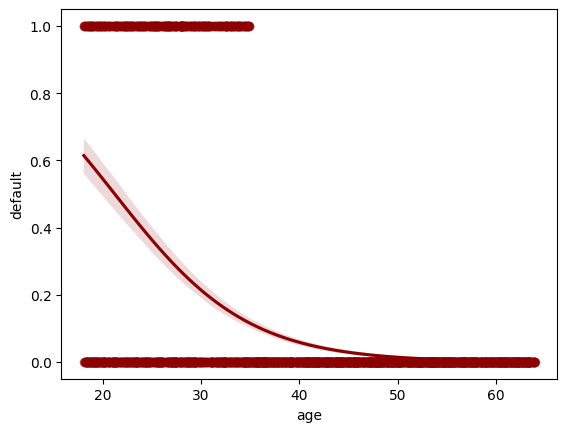

In [293]:
sns.regplot(x='age', y='default', data=credit_dataframe, logistic=True, color='darkred', scatter_kws={'alpha':0.5})

### Taxa de inadimplência por faixa etária:

In [294]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
credit_dataframe['age_group'] = pd.cut(credit_dataframe['age'], bins=bins, labels=labels, right=False)

In [295]:
default_rates = credit_dataframe.groupby('age_group')['default'].mean()

<ipython-input-295-4be163da62c4>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



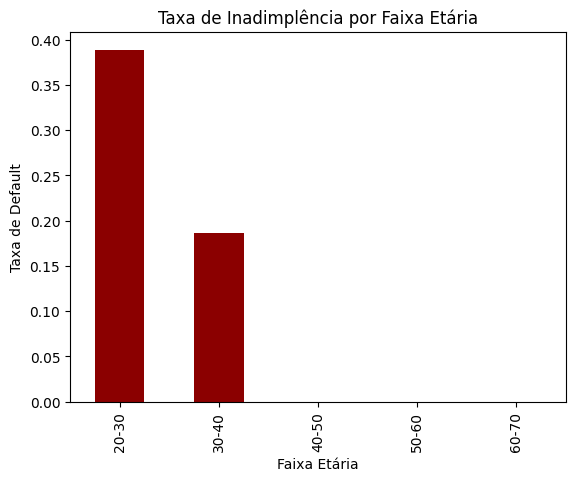

In [296]:
default_rates.plot(kind='bar', color='darkred')
plt.title('Taxa de Inadimplência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Default')
plt.show()

## 9.Endividamento e Score de Crédito

### Pessoas com maior endividamento têm pontuações de crédito mais baixas?

In [297]:
credit_dataframe['debt_ratio'] = credit_dataframe['loan'] / credit_dataframe['income']

<Axes: xlabel='debt_ratio', ylabel='score'>

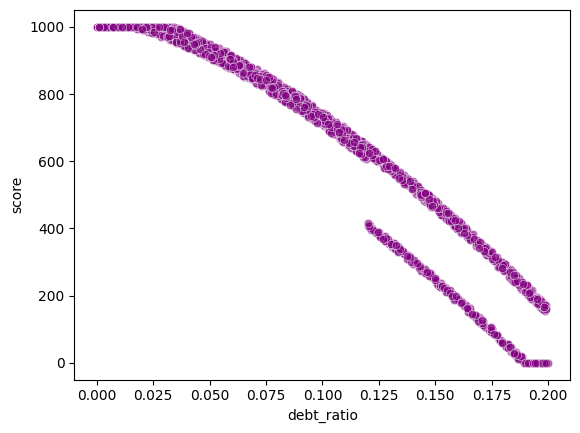

In [298]:
sns.scatterplot(x='debt_ratio', y='score', data=credit_dataframe, color='purple', alpha=0.6)

In [299]:
credit_dataframe['debt_bins'] = pd.qcut(credit_dataframe['debt_ratio'], q=4, labels=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])

<Axes: xlabel='score', ylabel='Count'>

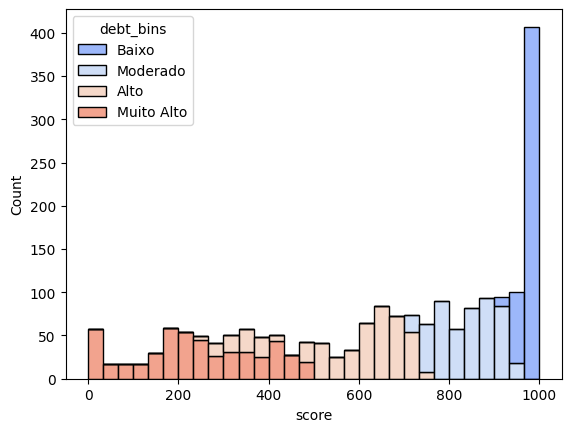

In [300]:
sns.histplot(data=credit_dataframe, x='score', hue='debt_bins', multiple='stack', bins=30, palette='coolwarm')

## 10.Conclusões e Recomendações para Modelagem

### Com base nos insights obtidos, quais variáveis parecem mais relevantes para um modelo de aprendizado de máquina?


As variaveis que se destacam como potenciais relevantes para um modelo de aprendizado de maquina são a renda, pois houve uma certa correlação entre renda mais baixa e pontuações de score mais baixas; o emprestimo, porque a proporção empréstimo/renda pareceu um fator importante — maiores empréstimos em relação à renda resultaram em scores mais baixos e; a idade, pois como proxy para tempo de histórico de crédito, ficou claro que clientes mais jovens tendem a ter mais inadimplência.

### Há necessidade de engenharia de features ou tratamento de dados para melhorar a qualidade do modelo?

Algumas variaveis derivadas que poderiam melhorar o modelo são:

*   Taxa de endividamento: loan/income
*   Faixa etária categórica: baseadas nas análises de idade (20-30, 30-40, etc.)
*   Score ajustado: para refletir melhor as interações entre idade, renda e empréstimo (como testamos nas correções)



Há valores anomalos e ausentes em idade e devem ser tratados para um melhor aprendizado.

Engenharia de Features:



*   Razão Empréstimo/Renda: Cria uma variável que indica o grau de endividamento relativo ao salário.
*   Faixas Etárias: Agrupar idades pode capturar melhor a relação entre histórico de crédito e inadimplência.
*   Interações entre variáveis: Testar multiplicações ou divisões entre variáveis pode capturar relações não-lineares.
*   Normalização/Escala: Modelos como Regressão Logística são sensíveis a escalas diferentes.

